# Convolution & Correlation

Dadas las señales discretas $x[n]$ e $y[n]$ podemos definir:
* Convolución
$$ \mathrm{conv}(x[n],y[n]) = \sum_{k=-\infty}^{\infty} x[k] y[n-k], \quad -\infty< n <\infty $$
* Correlación
$$ \mathrm{corr}(x[n],y[n]) = \sum_{k=-\infty}^{\infty} x[k] y^*[k-n], \quad -\infty< n <\infty $$

Aplicando la transformada de Fourier en el tiempo discreto se puede verificar las siguientes relaciones:
* Convolución
$$ \mathrm{conv}(x[n],y[n]) \overset{\mathrm{DTFT}}{\longleftrightarrow} X(\omega) \, Y(\omega) $$

* Correlación
$$ \mathrm{corr}(x[n],y[n]) \overset{\mathrm{DTFT}}{\longleftrightarrow} X(\omega) \, Y^*(\omega) $$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 24})
#%matplotlib inline

In [8]:
f0 = 1
f1 = 5
T_max = 4
N = 4000
t = np.arange(N) * T_max / N
signal0 = 2 * np.cos(2*np.pi*f0*t)
signal1 = 1 * np.sin(2*np.pi*f1*t)
signal = signal0 + signal1

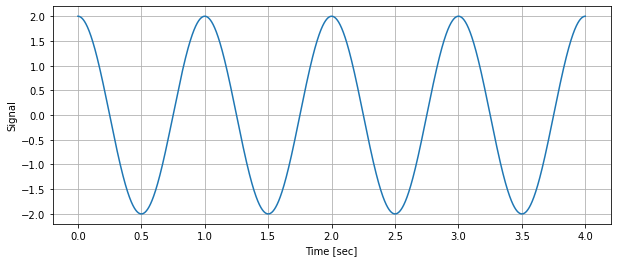

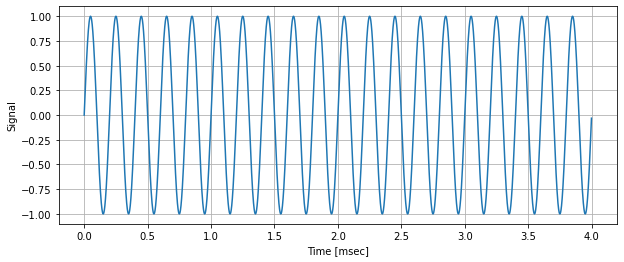

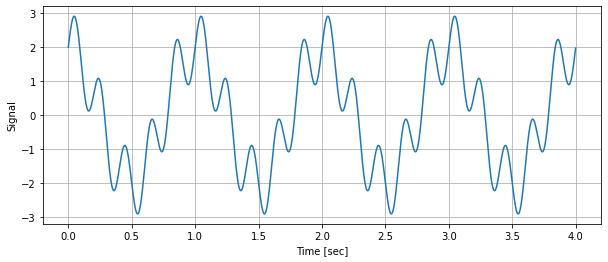

In [11]:
fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t,signal0)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Signal')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t,signal1)
ax.set_xlabel('Time [msec]')
ax.set_ylabel('Signal')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t,signal)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Signal')
ax.grid()


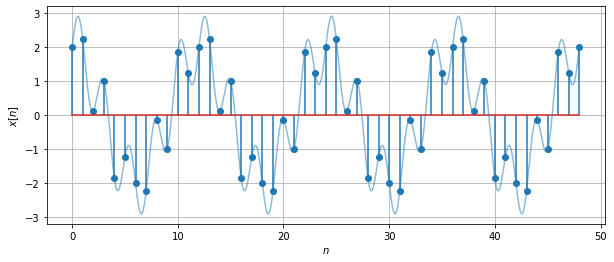

In [10]:
fs = 12
N = fs*T_max
n = np.arange(0,N+1)
Ts = 1/fs

tn = n*Ts

x0 = 2 * np.cos(2*np.pi*f0*tn)
x1 = 1 * np.sin(2*np.pi*f1*tn)
x = x0 + x1

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(n,x)
ax.plot(t*fs,signal,alpha=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$x[n]$')
ax.grid()



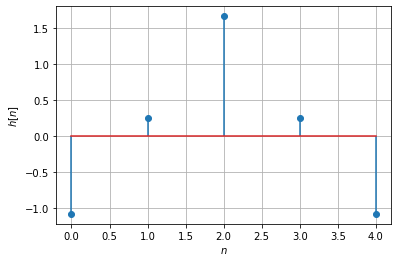

In [7]:
h = np.array([-1.3,0.3,2,0.3,-1.3])
h = 0.83 * h

fig, ax = plt.subplots()
ax.stem(h)
ax.set_xlabel('$n$')
ax.set_ylabel('$h[n]$')
ax.grid()



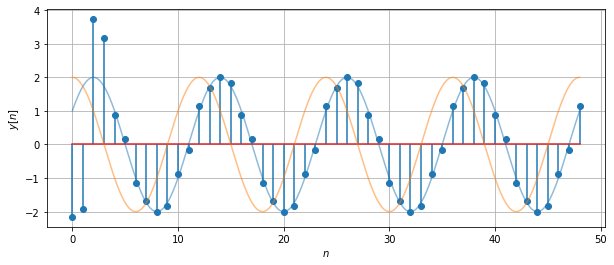

In [8]:
y = np.convolve(x,h,mode='full')

signal0_delayed = 2 * np.cos(2*np.pi*f0*(t-2*Ts))

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(y[0:N+1])
ax.plot(t*fs,signal0_delayed,alpha=0.5)
ax.plot(t*fs,signal0,alpha=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$y[n]$')
ax.grid()


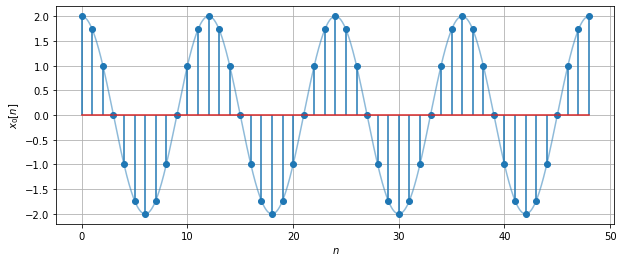

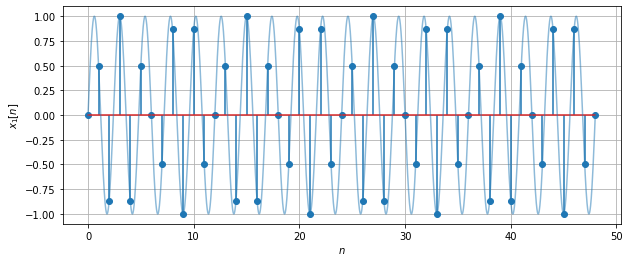

In [9]:
fig, ax = plt.subplots(figsize=[10,4])
ax.stem(n,x0)
ax.plot(t*fs,signal0,alpha=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$x_0[n]$')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(n,x1)
ax.plot(t*fs,signal1,alpha=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$x_1[n]$')
ax.grid()


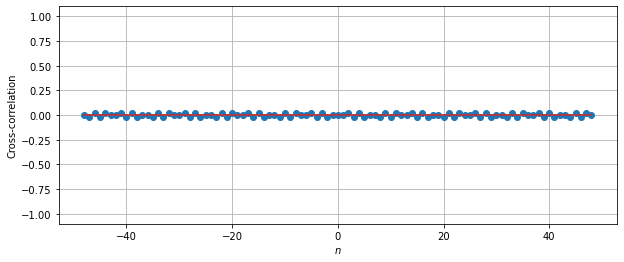

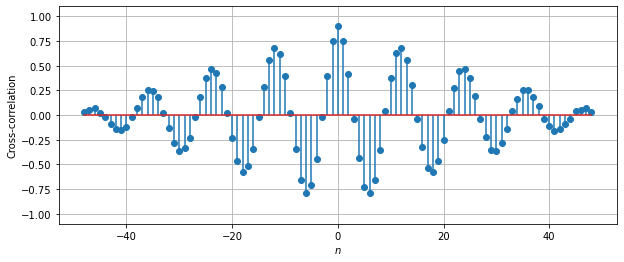

In [10]:
r0 = np.correlate(x0,x1,mode='full')
r1 = np.correlate(x0,x,mode='full')

nr = np.arange(-N,N+1)

p = np.sum(x**2)
p0 = np.sum(x0**2)
p1 = np.sum(x1**2)

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(nr,r0/np.sqrt(p0*p1))
ax.set_xlabel('$n$')
ax.set_ylim([-1.1,1.1])
ax.set_ylabel('Cross-correlation')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(nr,r1/np.sqrt(p0*p))
ax.set_xlabel('$n$')
ax.set_ylim([-1.1,1.1])
ax.set_ylabel('Cross-correlation')
ax.grid()
